In [16]:
# import 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [18]:
# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

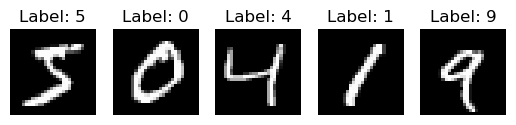

In [19]:
# Display the first five images and their labels
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [20]:
# Reshape data to fit the model
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [22]:
# Build a CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Use Input layer as the first layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8854 - loss: 0.3628 - val_accuracy: 0.9840 - val_loss: 0.0528
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9835 - loss: 0.0503 - val_accuracy: 0.9858 - val_loss: 0.0509
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9888 - loss: 0.0357 - val_accuracy: 0.9893 - val_loss: 0.0402
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9900 - val_loss: 0.0439
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9930 - loss: 0.0213 - val_accuracy: 0.9903 - val_loss: 0.0359


In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9906 - loss: 0.0357
Test accuracy: 0.9926999807357788


In [25]:
# Predict the test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


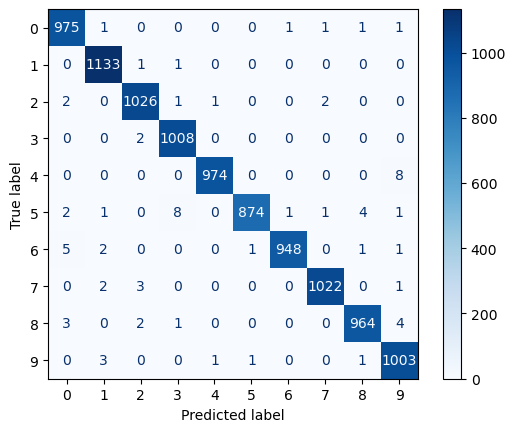

In [26]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Results

A Convolutional Neural Network (CNN) was built and trained using Keras.
The architecture of the CNN included:
Three convolutional layers with ReLU activation, interleaved with max-pooling layers.
A flattening layer to convert the 2D data into a 1D vector.
Two dense (fully connected) layers, with the final layer using softmax activation to produce probabilities for each of the 10 classes (digits 0-9).


### Test Accuracy:

The model achieved a test accuracy of 99.2%. This high accuracy indicates that the CNN classifier is performing exceptionally well in recognizing handwritten digits. The accuracy metric measures the proportion of correctly predicted instances out of the total instances in the test set.


### Confusion Matrix:

The confusion matrix visualizes how the CNN performs in classifying hand-written digits. We are able to visualize where misclassification is happening in the model, which can prove valuable for model optimization. 


Overall, the model's performance is impressive, with high accuracy and very few errors, making it a robust classifier for handwritten digit recognition.
